In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import math 
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.datasets import load_iris
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix

In [50]:
df=pd.read_csv("/Users/apple/Desktop/Loan prediction /loan.csv")
display(df)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


#Data cleaning and preprocessing 

In [51]:
column_list=[]
column_list=df.columns.tolist()
print(column_list)

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']


In [52]:
import numpy as np

column_list = df.columns.tolist()

for i in column_list:
    if df[i].dtype.kind in 'fi': 
        nan_values = np.isnan(df[i])
        inf_values = np.isinf(df[i])
        non_finite_values = np.logical_not(np.isfinite(df[i]))
        
        print(f"Column: {i}")
        print(f"NaN Values: {nan_values.sum()}")
        print(f"Infinite Values: {inf_values.sum()}")
        print(f"Non-Finite Values: {non_finite_values.sum()}\n")
        
    else:
        
        nan_values = None
        inf_values = None
        non_finite_values = None

    



Column: ApplicantIncome
NaN Values: 0
Infinite Values: 0
Non-Finite Values: 0

Column: CoapplicantIncome
NaN Values: 0
Infinite Values: 0
Non-Finite Values: 0

Column: LoanAmount
NaN Values: 22
Infinite Values: 0
Non-Finite Values: 22

Column: Loan_Amount_Term
NaN Values: 14
Infinite Values: 0
Non-Finite Values: 14

Column: Credit_History
NaN Values: 50
Infinite Values: 0
Non-Finite Values: 50



In [53]:
def update_non_numeric_to_binary_values_for_a_column(df, column_name):


    non_unique_values = df[column_name].unique()
    binary_values = np.arange(len(non_unique_values))
    value_to_binary_value_map = dict(zip(non_unique_values, binary_values))

    df[column_name] = df[column_name].map(value_to_binary_value_map)

    return df

In [54]:

df = update_non_numeric_to_binary_values_for_a_column(df, column_name='Property_Area')
df = update_non_numeric_to_binary_values_for_a_column(df, column_name='Gender')
df = update_non_numeric_to_binary_values_for_a_column(df, column_name='Education')
df = update_non_numeric_to_binary_values_for_a_column(df, column_name='Self_Employed')
df = update_non_numeric_to_binary_values_for_a_column(df, column_name='Property_Area')
df = update_non_numeric_to_binary_values_for_a_column(df, column_name='Married')
df = update_non_numeric_to_binary_values_for_a_column(df, column_name='Loan_Status')

print(df)


      Loan_ID  Gender  Married Dependents  Education  Self_Employed  \
0    LP001002       0        0          0          0              0   
1    LP001003       0        1          1          0              0   
2    LP001005       0        1          0          0              1   
3    LP001006       0        1          0          1              0   
4    LP001008       0        0          0          0              0   
..        ...     ...      ...        ...        ...            ...   
609  LP002978       1        0          0          0              0   
610  LP002979       0        1         3+          0              0   
611  LP002983       0        1          1          0              0   
612  LP002984       0        1          2          0              0   
613  LP002990       1        0          0          0              1   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
1

In [55]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)

df['Married'].fillna(df['Married'].mode()[0],inplace=True)

df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)

df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)

df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

df.LoanAmount=df.LoanAmount.fillna(df.LoanAmount.mean())

df.CoapplicantIncome=df.CoapplicantIncome.fillna(df.CoapplicantIncome.mean())

df.ApplicantIncome=df.ApplicantIncome.fillna(df.ApplicantIncome.mean())

df['Gender'] = df['Gender'].replace(2, 1)
df['Dependents'] = df['Dependents'].str.replace('3\+', '3', regex=True)

display(df)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,0,0,5849,0.0,146.412162,360.0,1.0,0,0
1,LP001003,0,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,1,1
2,LP001005,0,1,0,0,1,3000,0.0,66.000000,360.0,1.0,0,0
3,LP001006,0,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,0,0
4,LP001008,0,0,0,0,0,6000,0.0,141.000000,360.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,0,0,0,0,2900,0.0,71.000000,360.0,1.0,1,0
610,LP002979,0,1,3,0,0,4106,0.0,40.000000,180.0,1.0,1,0
611,LP002983,0,1,1,0,0,8072,240.0,253.000000,360.0,1.0,0,0
612,LP002984,0,1,2,0,0,7583,0.0,187.000000,360.0,1.0,0,0


In [56]:
# df['Dependents'] = df['Dependents'].str.replace('3\+', '3', regex=True)


In [57]:
import numpy as np

column_list = df.columns.tolist()

for i in column_list:
    if df[i].dtype.kind in 'fi': 
        nan_values = np.isnan(df[i])
        inf_values = np.isinf(df[i])
        non_finite_values = np.logical_not(np.isfinite(df[i]))
        
        print(f"Column: {i}")
        print(f"NaN Values: {nan_values.sum()}")
        print(f"Infinite Values: {inf_values.sum()}")
        print(f"Non-Finite Values: {non_finite_values.sum()}\n")
        
    else:
        
        nan_values = None
        inf_values = None
        non_finite_values = None

    

Column: Gender
NaN Values: 0
Infinite Values: 0
Non-Finite Values: 0

Column: Married
NaN Values: 0
Infinite Values: 0
Non-Finite Values: 0

Column: Education
NaN Values: 0
Infinite Values: 0
Non-Finite Values: 0

Column: Self_Employed
NaN Values: 0
Infinite Values: 0
Non-Finite Values: 0

Column: ApplicantIncome
NaN Values: 0
Infinite Values: 0
Non-Finite Values: 0

Column: CoapplicantIncome
NaN Values: 0
Infinite Values: 0
Non-Finite Values: 0

Column: LoanAmount
NaN Values: 0
Infinite Values: 0
Non-Finite Values: 0

Column: Loan_Amount_Term
NaN Values: 0
Infinite Values: 0
Non-Finite Values: 0

Column: Credit_History
NaN Values: 0
Infinite Values: 0
Non-Finite Values: 0

Column: Property_Area
NaN Values: 0
Infinite Values: 0
Non-Finite Values: 0

Column: Loan_Status
NaN Values: 0
Infinite Values: 0
Non-Finite Values: 0



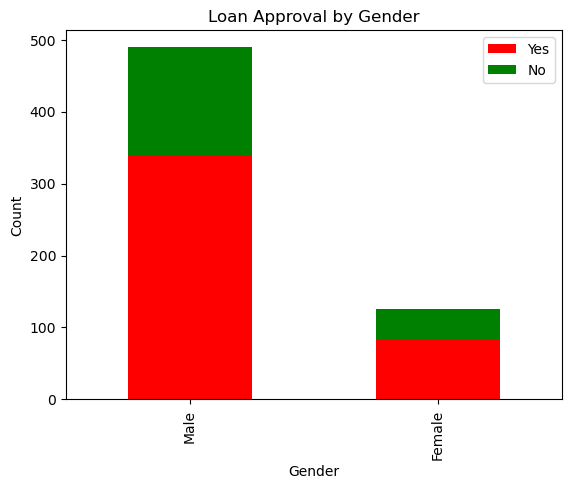

In [58]:

import pandas as pd
import matplotlib.pyplot as plt


cross_table = pd.crosstab(df['Gender'], df['Loan_Status'])


cross_table.index = ['Male' if gender == 0 else 'Female' for gender in cross_table.index]


cross_table.columns = ['Yes' if status == 0 else 'No' for status in cross_table.columns]


cross_table.plot(kind='bar', stacked=True, color=['red', 'green'])


plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Loan Approval by Gender')


plt.show()



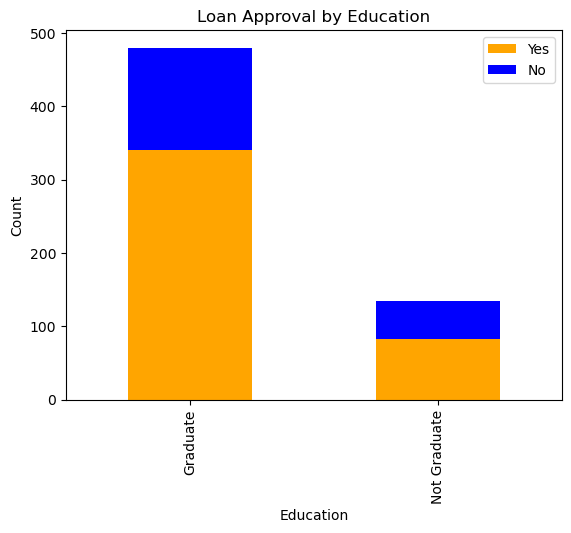

In [59]:

import pandas as pd
import matplotlib.pyplot as plt


cross_table1 = pd.crosstab(df['Education'], df['Loan_Status'])


cross_table1.index = ['Graduate' if education == 0 else 'Not Graduate' for education in cross_table1.index]
cross_table1.columns = ['Yes' if status == 0 else 'No' for status in cross_table1.columns]


cross_table1.plot(kind='bar', stacked=True, color=['orange', 'blue'])

plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Loan Approval by Education')


plt.show()


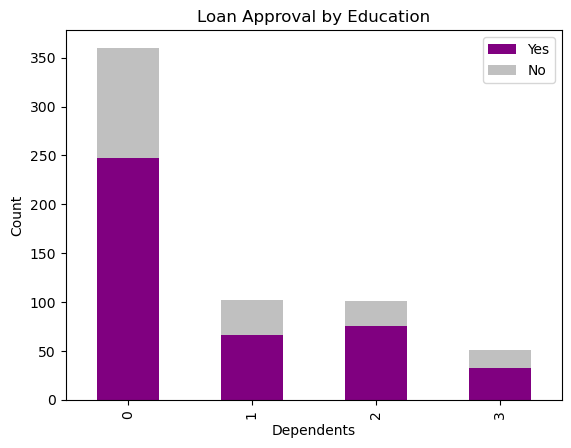

In [60]:

import pandas as pd
import matplotlib.pyplot as plt


cross_table1 = pd.crosstab(df['Dependents'], df['Loan_Status'])



cross_table1.columns = ['Yes' if status == 0 else 'No' for status in cross_table1.columns]

cross_table1.plot(kind='bar', stacked=True, color=['purple', 'silver'])


plt.xlabel('Dependents')
plt.ylabel('Count')
plt.title('Loan Approval by Education')


plt.show()

#Logistic Regression

In [61]:
x = df.iloc[:,-12:-1]
y = df.iloc[:,-1:]

print(x)
print(y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
0         0        0          0          0              0             5849   
1         0        1          1          0              0             4583   
2         0        1          0          0              1             3000   
3         0        1          0          1              0             2583   
4         0        0          0          0              0             6000   
..      ...      ...        ...        ...            ...              ...   
609       1        0          0          0              0             2900   
610       0        1          3          0              0             4106   
611       0        1          1          0              0             8072   
612       0        1          2          0              0             7583   
613       1        0          0          0              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

Accuracy: 0.8324324324324325
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.99      0.89       134
           1       0.92      0.43      0.59        51

    accuracy                           0.83       185
   macro avg       0.87      0.71      0.74       185
weighted avg       0.85      0.83      0.81       185

[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

testing the accuracy of our model:
[0]
[1]


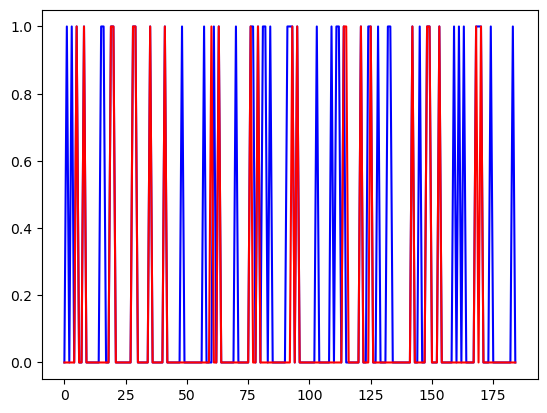

In [62]:

x = x.replace([np.inf, -np.inf], np.nan).dropna()
y = y.loc[x.index]


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=0)


y_train = y_train.values.ravel()
y_test = y_test.values.ravel()


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)


y_pred = model.predict(X_test)



plt.plot(y_test,color='blue')
plt.plot(y_pred, color='red')


accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)
print(y_pred)

testing1 = np.array([0,0,0,0,0,5849,0.0,146.412,360.0,1.0,0])
testing2 = np.array([0,0,1,0,1,6583,3508.0,318.000000,360.0,1.0,1])
# Reshape the array to a 2D array with one row and 11 columns
test1 = testing1.reshape(1, -1)
test2 = testing2.reshape(1, -1)


y_pred2 = model.predict(test1)
y_pred3 = model.predict(test2)
print('\ntesting the accuracy of our model:')
print(y_pred2)# testing the same inputs as our data
print(y_pred3)# taking random values
plt.show()


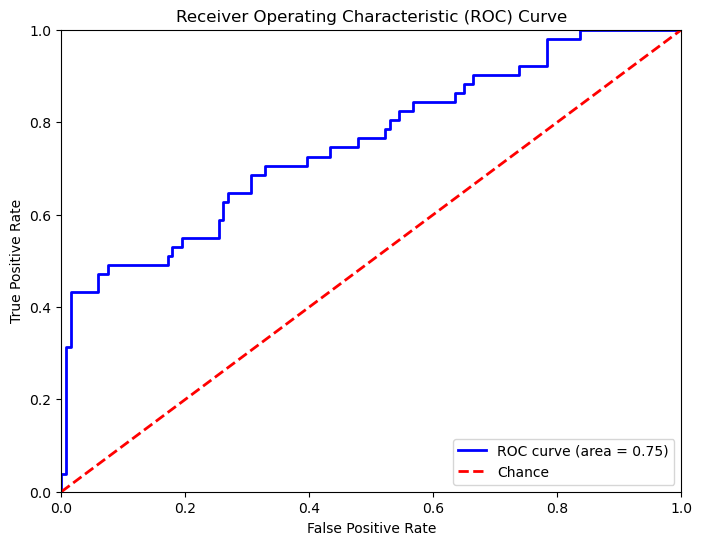

In [63]:
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve from predictions
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC (Area under the ROC Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

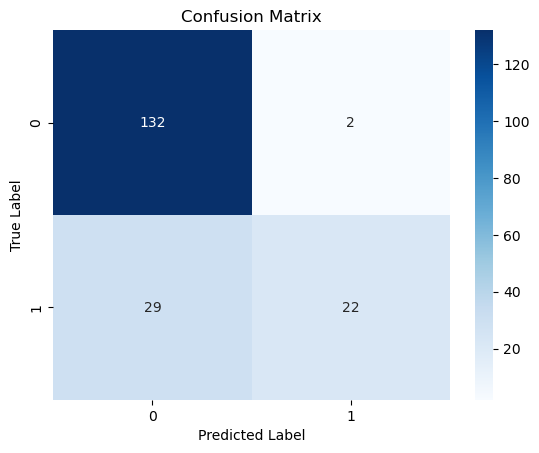

In [64]:
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn's heatmap()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#In the context of a loan approval prediction model using SVM, accuracy measures the percentage of loan applications that were correctly classified as either approved or rejected. 

In [16]:
svm = SVC(kernel='linear', C=1.0)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)



Accuracy: 0.827027027027027


In [17]:
#Multiple Regression

In [18]:
X = df[['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']]
y = df['Loan_Status'] 

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)


In [20]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [22]:
print('Mean Squared Error:', mse)
print('R-squared (R2) Score:', r2)


Mean Squared Error: 0.12012819297406355
R-squared (R2) Score: 0.3450031577414181


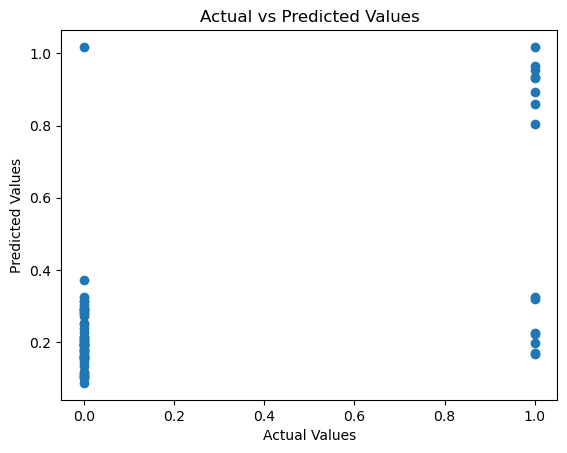

In [23]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

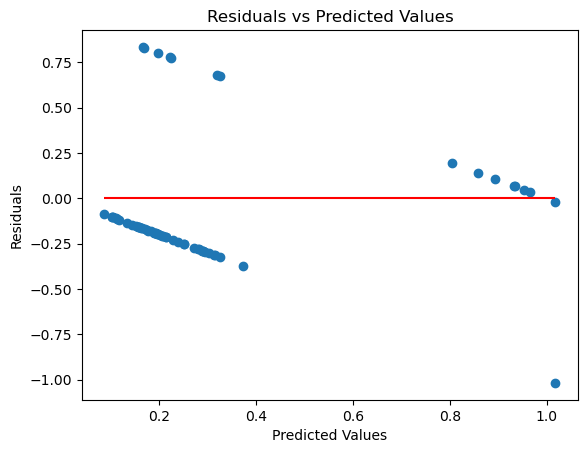

In [24]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red')
plt.title('Residuals vs Predicted Values')
plt.show()


In [25]:
#Polynomial Regression 

In [26]:
degree = 2 
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [27]:
model_p = LinearRegression()
model_p.fit(X_train_poly, y_train)
y_pred = model_p.predict(X_test_poly)
mse_p = mean_squared_error(y_test, y_pred)
r2_p = r2_score(y_test, y_pred)

In [28]:
coefficients = model_p.coef_
intercept = model_p.intercept_
print("Coefficients:")
print(coefficients)
print("Intercept:")
print(intercept)

Coefficients:
[ 5.70546438e-09  1.91508552e-01  1.12068013e-01  6.00742247e-02
  2.50282074e-01  3.62296040e-01 -8.18619492e-05  5.47520780e-05
  2.11212785e-03 -1.76061825e-03 -3.05968829e-01  2.55375512e-01
  1.91508499e-01  1.28255873e-01  4.05424182e-02 -1.43326120e-01
 -1.25571374e-02 -1.51869585e-05 -5.72439645e-05 -3.58647017e-04
 -3.47893655e-04 -8.33045594e-02 -5.29888297e-02 -5.73215243e-02
  7.60698224e-03  2.89724441e-02  9.43963880e-03  3.33845106e-06
  1.40906773e-05  1.01978240e-04 -9.18266786e-05 -1.62363021e-01
 -1.13133632e-02 -7.35750199e-03  1.85646790e-02 -3.96964351e-02
 -1.03206091e-05 -2.95082235e-06 -1.24341511e-05 -1.25884966e-04
  4.27927602e-02  2.34220220e-03  2.50282071e-01 -3.08276459e-03
 -1.06338565e-05 -7.53409245e-05 -4.94021505e-04 -7.52582889e-04
  3.17381747e-02 -3.48856865e-02 -5.56776420e-03 -2.56564435e-06
 -1.06888281e-06 -6.93833675e-04 -8.97642863e-05 -1.46657952e-01
 -1.41372344e-02 -6.28547769e-11 -2.36803255e-09  1.18523236e-07
  2.0707025

In [29]:
print('Mean Squared Error (MSE):', mse_p)
print('R-squared (R2) Score:', r2_p)

Mean Squared Error (MSE): 0.1252541560669003
R-squared (R2) Score: 0.31705393486359623


In [30]:
#Decision Tree

In [31]:


import math
import pandas as pd

def entropy(data):
    p, n = 0, 0
    # Assuming 'Loan_Status' is the name of the column you're interested in
    # Adjust the column name if necessary
    x = data['Loan_Status'].value_counts()
    if len(x) > 1:
        if data['Loan_Status'].iloc[0] == 0:
            n, p = x.iloc[0], x.iloc[1]
        else:
            p, n = x.iloc[0], x.iloc[1]
    else:
        if data['Loan_Status'].iloc[0] == 0:
            n = x.iloc[0]
        else:
            p = x.iloc[0]
    p_ratio = p / (p + n)
    n_ratio = n / (p + n)
    entropy_p = -p_ratio * math.log2(p_ratio) if p_ratio != 0 else 0
    entropy_n = -n_ratio * math.log2(n_ratio) if n_ratio != 0 else 0
    return entropy_p + entropy_n

def info_gain(data,feature):
    unique_values = data[feature].unique()
    feature_weights = [len(data[data[feature] == val]) for val in unique_values]
    entropies = [entropy(data[data[feature] == val]) for val in unique_values]
    info_gain_feature = sum(feature_weights[i] / sum(feature_weights) * entropies[i] for i in range(len(unique_values)))
    info_gain = entropy(data) - info_gain_feature
    
    return info_gain


entropy(df)
print(info_gain(df,"Education"))
print(info_gain(df,"Self_Employed"))
print(info_gain(df,"ApplicantIncome"))
print(info_gain(df,"CoapplicantIncome"))
print(info_gain(df,"LoanAmount"))
print(info_gain(df,"Loan_Amount_Term"))
print(info_gain(df,"Credit_History"))


0.005180472723288698
0.0001895785946516293
0.7461845982551035
0.4178676935171995
0.29614452720535644
0.01793540781630676
0.20543973297367224


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

class Node:
    def __init__(self, data, parent_feature=None, parent_feature_value=None):
        self.data = data  
        self.parent_feature = parent_feature  
        self.parent_feature_value = parent_feature_value  
        self.children = {}  

def id3_decision_tree(data, features, target, parent_feature=None, parent_feature_value=None):
    node = Node(data, parent_feature, parent_feature_value) 
    if len(data['Loan_Status'].unique()) == 1:
        return data['Loan_Status'].values[0]    
    if len(features) == 0:
        return data['Loan_Status'].mode().values[0]    
    gains = {feature: info_gain(data, feature) for feature in features}    
    best_feature = max(gains, key=gains.get)    
    for value in data[best_feature].unique():
        child_data = data[data[best_feature] == value].drop([best_feature], axis=1)
        node.children[value] = id3_decision_tree(child_data, features.drop(best_feature), target, best_feature, value)
    return node

features = df.columns[:-1]
target = 'Loan_Status'

decision_tree = id3_decision_tree(df, features, target)

def print_decision_tree(node, indent=""):
    if isinstance(node, Node):
        if node.parent_feature is not None:
            print(indent + "Feature: " + node.parent_feature)
            print(indent + "Parent Feature Value: " + str(node.parent_feature_value))
        
        if len(node.children) == 0:
            print(indent + "LoanStatus: " + str(node.data['Loan_Status'].values[0]))
        else:
            for value, child_node in node.children.items():
                print(indent + "Loan ID: " + str(value))
                print_decision_tree(child_node, indent + "  ")
    else:
        print(indent + "Loan-Status: " + str(node))
        
print_decision_tree(decision_tree)

Loan ID: LP001002
  Loan-Status: 0
Loan ID: LP001003
  Loan-Status: 1
Loan ID: LP001005
  Loan-Status: 0
Loan ID: LP001006
  Loan-Status: 0
Loan ID: LP001008
  Loan-Status: 0
Loan ID: LP001011
  Loan-Status: 0
Loan ID: LP001013
  Loan-Status: 0
Loan ID: LP001014
  Loan-Status: 1
Loan ID: LP001018
  Loan-Status: 0
Loan ID: LP001020
  Loan-Status: 1
Loan ID: LP001024
  Loan-Status: 0
Loan ID: LP001027
  Loan-Status: 0
Loan ID: LP001028
  Loan-Status: 0
Loan ID: LP001029
  Loan-Status: 1
Loan ID: LP001030
  Loan-Status: 0
Loan ID: LP001032
  Loan-Status: 0
Loan ID: LP001034
  Loan-Status: 0
Loan ID: LP001036
  Loan-Status: 1
Loan ID: LP001038
  Loan-Status: 1
Loan ID: LP001041
  Loan-Status: 0
Loan ID: LP001043
  Loan-Status: 1
Loan ID: LP001046
  Loan-Status: 0
Loan ID: LP001047
  Loan-Status: 1
Loan ID: LP001050
  Loan-Status: 1
Loan ID: LP001052
  Loan-Status: 1
Loan ID: LP001066
  Loan-Status: 0
Loan ID: LP001068
  Loan-Status: 0
Loan ID: LP001073
  Loan-Status: 0
Loan ID: LP001086
  